# Install Behave

```
pip install behave
```

# Directory Structure

* BDD consists of:
    * Steps (Given, When, Then, And, But): Located in feature files (`.feature`).
    * Steps Definitions: Located in Python files (`.py`).
* Behave handles several options for directory layout or folder structure.
* A `steps` directory is required in the directory which contains the feature files.

Two examples that meet the minimum requirement are:

**Test Layout Option 1**:

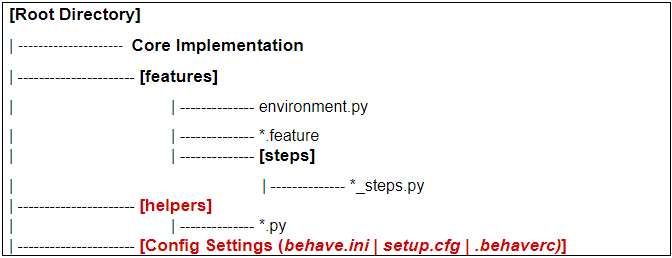


**Test Layout Option 2**:

```
[Root]

|--------------------Core Implementation

|--------------------[features]
                            |-------------- testcase1.feature
                            |-------------- testcase2.feature                          
                            |-------------- testcase3.feature
                            
|-------------------- [steps]
                            |-------------- steps.py                           
                            |-------------- more_python.py
```

**EXAMPLE:**

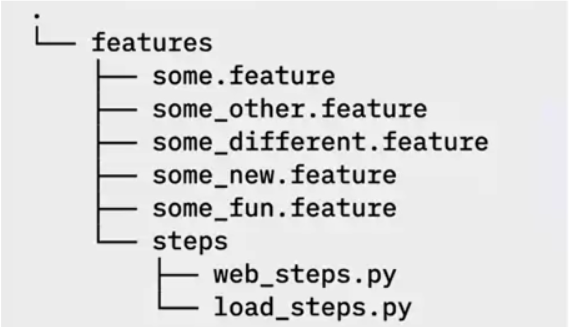

* Behave looks for a folder named “**features**”.
* Inside the features folder, Behave looks for files with an extension of **"`.feature`"**.
* Behave will process each one it finds in the **features** folder.
* The features folder also contains a subfolder called “**steps**”.
* Inside the **steps folder** is a collection of python files that have the steps that match the **Gherkin** statements in the **feature** files.
* Convention for **steps file** is to use “`_steps`” in the name to signify that they’re steps files
* Best practice suggests that you place all of the generic steps that manipulate the web interface, regardless of application, into a file called “**`web_steps.py`**”.
* If you have additional Python files containing steps, you could store them in the steps folder as well, such as, **`load_steps.py`** for loading sample data for scenarios.
* Behave will load all of the steps in the python files in this folder.

> **Note:**
> * *There is `no one-to-one correlation between the feature files and the step files`.*
> * *For example, I can have `5 feature files` but only `two step files`.*
> * *As long as the python steps cover all of the statements in the `.feature` files, everything will work.*

# Feature file

* **Feature**
    * Feature file has `.feature` extension.
    * A feature is equivalent to a story.
    * Starts with the `Feature:` keyword. 
    * Each feature file can have only one `Feature:` keyword.
* **Scenario/Test case**
    * Starts with the `Scenario:` keyword.
    * Can have multiple scenarios in a single feature file.
* **Steps**
* One or multiple lines with keywords: `Given`, `When`, `Then`, `And`, and `But`.
* Can have multiple steps in a single scenario.

**Example: `login.feature`**

```gherkin
Feature: Attempt to logging in with invalid credentials


    Scenario: None existing user try to login

        Given I generate a random email address
        When I type random email
        When I type correct password
        When I click on 'Login'
        Then I should see the text 'Error: User not found'


    Scenario: User try to login with wrong password

        Given I create a user
        When I type correct email
        When I type random password
        When I click on 'Login'
        Then I should see the text 'Error: Incorrect password'


    Scenario: User try to login with no password

        Given I create a user
        When I type correct email
        When I click on 'Login'
        Then I should see the text 'Error: Password field is empty'


    Scenario: User try to login with invalid format email

        When I type invalid format email
        When I type correct password
        When I click on 'Login'
        Then I should see the text 'Error: Email is invalid format'
```

# Step defintion file

* Step definitions is `.py` file which contains the implementation of the steps of the feature files.
* Each step is represented as a Python function and must have any one of the decorators: `Given`, `When`, `Then`, `And`, or `But`.

**Example: `user_login_steps.py`**

```python

from behave import given, when, then
import user
import assertions
import pdb

@given("I create a new user")
def create_new_user(context):
    """
    Step to create a new user.
    :return:
    """
    print("I am creating a new user")
    print(":) :) :) :) :) :)")
    print("More code would go here")
    # user.user_creator()
    prefix = context.config.userdata.get('prefix')

    pdb.set_trace()

@when("I type email")
def type_the_email(context):
    """
    Step to type email address in the email field
    :return:
    """

    print("Typing the email in the email field.")
    # email_field = driver.find_element('id', 'email')
    # email_field.send_keys('test@supersqa.com')
    print("Just finished typing the email :)")

@when("I type password")
def type_the_password(context):
    """
    Step to type email address in the password field
    :return:
    """
    print("Typing the password in the password field")
    # pass_field = driver.find_element_by_id('password')
    # pass_field.send_keys('123456')
    print("Just typed the password. :)")

@when("I click on 'Login'")
def click_login(context):
    """
    Step to click login
    :return:
    """
    print("I am clicking login!!!!")

@then("I should see the text Welcome")
def see_welcome_text(context):
    """
    Step to verify text is displayed
    :return:
    """
    assertions.assert_text_visible('Welcome')
    print("checking if 'Welcome' text is displayed")
    print("Yep it sure is there!!!")
    print("PASS!!!")

@when("I type correct email")
def type_correct_email(context):
    print("Typing correct email.")

```